In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (18,10)

In [122]:
df = pd.read_csv("spirals.csv", index_col="Unnamed: 0")

In [123]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',n_neighbors=4 ,
                        random_state=1203, assign_labels = "cluster_qr").fit(X)

/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [124]:
df["labels"] = sc.labels_

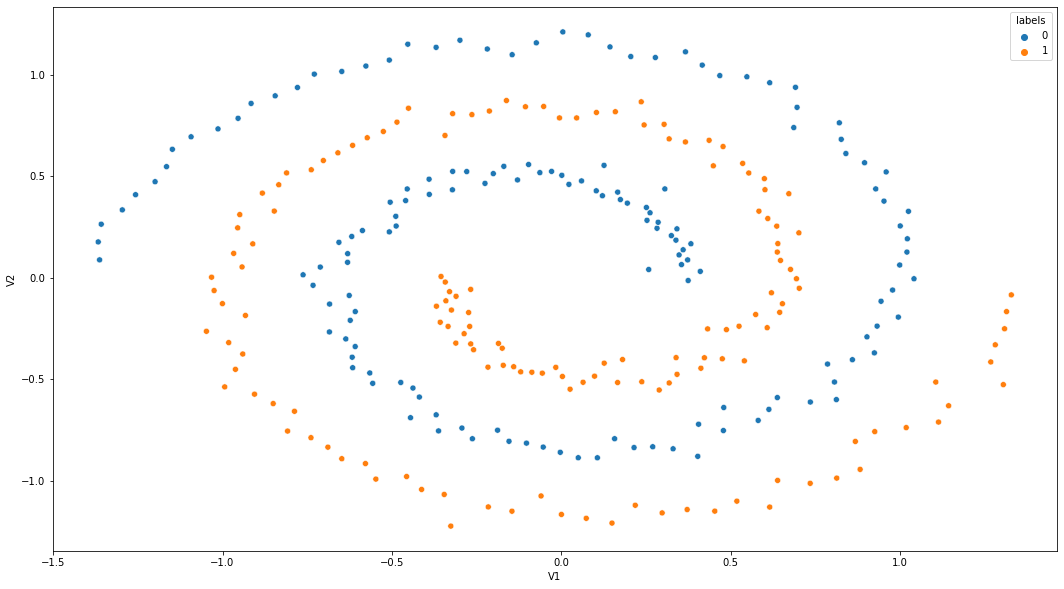

In [125]:
sns.scatterplot(data = df, x = 'V1', y= 'V2', hue = "labels");

### EJERCICIO PARA HACER EN CLASE

- 1. Comparar el resultado que arrojaria dbscan para "spirals" 

- 2. Comparar la permonce de ambos metodos para "multishapes" (utilizar en numero de clusters en specc que considere adecuado)

- 3. Observar como funciona specc con banknote

In [126]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

sil_score = []

epsilons = np.linspace(0.1, .3, 100)

for epsilon in epsilons:
    db=DBSCAN(eps=epsilon, min_samples=4)
    sil_score.append(silhouette_score(X, db.fit_predict(X)))
best_eps=epsilons[np.argmax(sil_score)]



best_db = DBSCAN(eps=.25, min_samples=3).fit(X)
df['predicted_labels_dbs']=best_db.fit_predict(X)

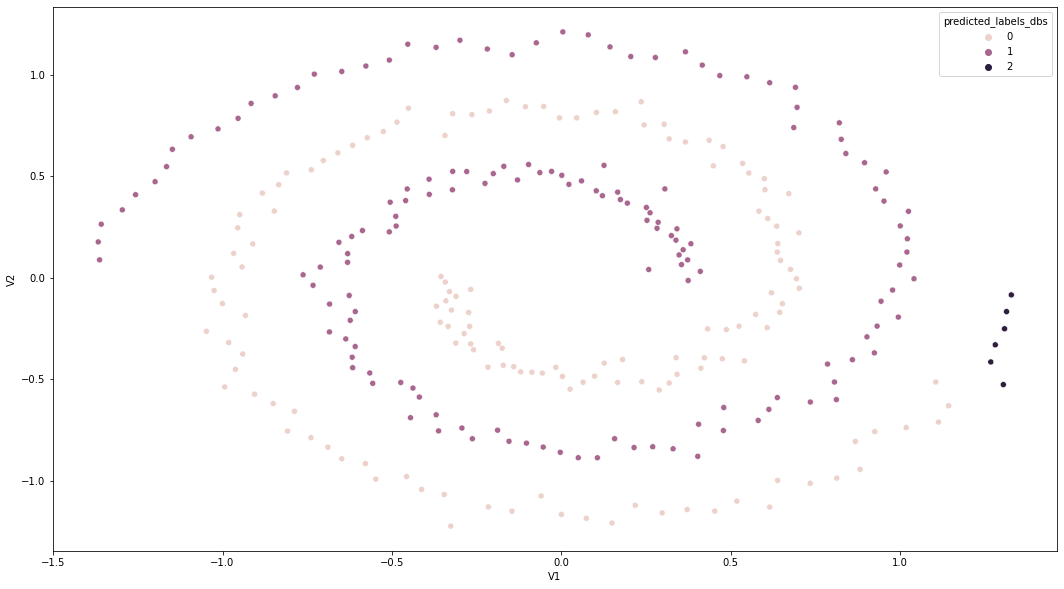

In [127]:
sns.scatterplot(data = df, x = 'V1', y= 'V2', hue = "predicted_labels_dbs");

In [128]:
banknote=pd.read_csv("banknote.csv", sep = " ")

banknote.head()

banknote_scaled = StandardScaler().fit_transform(banknote)

In [129]:
best_clusters = []
sil_score_sc = []
clusters = range(2,11)

for cluster in clusters:
    sc = SpectralClustering(n_clusters=cluster, affinity='rbf',random_state=12).fit(banknote_scaled)
    sil_score_sc.append(silhouette_score(banknote_scaled, sc.fit_predict(banknote_scaled)))
best_clusters=clusters[np.argmax(sil_score_sc)]

sc.fit_predict(banknote_scaled)

best_sc = SpectralClustering(n_clusters=best_clusters, affinity='rbf',random_state=12).fit(banknote_scaled)
banknote['sc_labels']=best_sc.fit_predict(banknote_scaled)

In [130]:
banknote.sc_labels.value_counts()

0    100
1     10
Name: sc_labels, dtype: int64

### NOTAS DE CAMBIO FALSAS SEGUN SPECTRAL CLUSTERING

In [131]:
banknote[banknote.sc_labels==1]

,Length,Left,Right,Bottom,Top,Diagonal,sc_labels
100,215.1,130.0,130.3,11.6,10.5,139.7,1
101,214.6,129.9,129.7,11.9,10.1,139.0,1
102,214.8,130.1,130.1,11.9,11.1,139.5,1
103,214.9,130.6,130.4,11.9,10.5,139.8,1
104,214.6,130.5,130.4,10.1,11.4,139.3,1
105,214.4,130.1,130.0,11.3,10.7,139.2,1
106,214.6,129.7,129.3,10.4,11.0,139.3,1
107,214.5,130.5,130.2,11.8,10.2,139.6,1
108,214.3,130.2,130.0,10.7,10.5,139.8,1
109,214.9,129.9,130.0,9.9,12.3,139.4,1
